In [1]:
#Importing necessary libraries
#pandas- Data(rows and columns) manipulation library
#numpy- Variable manippulation library
#seaborn- Data visualization library
#matplotlib- Graph plotting and visualization library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#inline gives us inline view charts and plots 
%matplotlib inline

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
#importing the training dataset into the 'train' variable using the read_csv function of pandas(imported as pd)

In [5]:
train=pd.read_csv('application_train.csv')


In [6]:
print(train.shape)


(307511, 122)


In [7]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [9]:
#From the above output, we come to know that there are 65 float(most probably continuos variables) and 16 string variables which can be considered as categorical

In [10]:
# Now we will encode categorical string variables with integer numbers.

In [11]:
# Create a label encoder object
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in train:
    if train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(train[col].unique())) <= 2:
            # Train on the training data
            le.fit(train[col])
            # Transform both training and testing data
            train[col] = le.transform(train[col])
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [12]:
train = pd.get_dummies(train)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 243 entries, SK_ID_CURR to EMERGENCYSTATE_MODE_Yes
dtypes: float64(65), int32(3), int64(41), uint8(134)
memory usage: 291.5 MB


In [14]:
(train['DAYS_EMPLOYED']/365).describe()

count    307511.000000
mean        174.835742
std         387.056895
min         -49.073973
25%          -7.561644
50%          -3.323288
75%          -0.791781
max        1000.665753
Name: DAYS_EMPLOYED, dtype: float64

In [15]:
#As we can see that in 'DAYS_EMPLOYED' column the maximum value is 1000 years which is highly unlikely!!(duhhh.....)
#This appears to be a typo and we need to rectify it

In [16]:
(train['DAYS_EMPLOYED']).describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [17]:
anomaly_in_days=train[train['DAYS_EMPLOYED']==365243]

In [18]:
n=len(anomaly_in_days.index)

In [19]:
m=len(anomaly_in_days[anomaly_in_days['TARGET']==1].index)

In [20]:
(m/n)*100

5.399646043269405

In [21]:
no_anomaly=train[train['DAYS_EMPLOYED']!=365243]

In [22]:
n=len(no_anomaly.index)
m=len(no_anomaly[no_anomaly['TARGET']==1])
(m/n)*100

8.65997453765215

In [23]:
#This implies that anomalous days have lower precentage of default than non anomalous.
#We need to replace these values with NaN values

In [24]:
train['DAYS_EMPLOYED'].replace(365243, value=np.nan, inplace=True)

In [25]:
train['DAYS_EMPLOYED'].describe()

count    252137.000000
mean      -2384.169325
std        2338.360162
min      -17912.000000
25%       -3175.000000
50%       -1648.000000
75%        -767.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

In [26]:
#Now we handled the categorical variables and anomalies.
#Let's look at correlation between variables and also with respect to the target

In [27]:
correlations=train.corr()

In [28]:
print('\nPositive correlation\n')
print(correlations['TARGET'].sort_values(ascending=False).head(15))
print('\nNegative correlation\n')
print(correlations['TARGET'].sort_values(ascending=False).tail(15))


Positive correlation

TARGET                                               1.000000
DAYS_BIRTH                                           0.078239
DAYS_EMPLOYED                                        0.074958
REGION_RATING_CLIENT_W_CITY                          0.060893
REGION_RATING_CLIENT                                 0.058899
NAME_INCOME_TYPE_Working                             0.057481
DAYS_LAST_PHONE_CHANGE                               0.055218
CODE_GENDER_M                                        0.054713
DAYS_ID_PUBLISH                                      0.051457
REG_CITY_NOT_WORK_CITY                               0.050994
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
FLAG_EMP_PHONE                                       0.045982
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_DOCUMENT_3                                      0.044346
OCCUPATION_TYPE_Laborers                             0.043019
Name: TARGET, dtype: float64

Negative correlat

In [29]:
'''
correlation visualization
fig, axes=plt.subplots(figsize=(50,50))
sns.heatmap(train.corr(), annot=True,ax=axes)
'''

'\ncorrelation visualization\nfig, axes=plt.subplots(figsize=(50,50))\nsns.heatmap(train.corr(), annot=True,ax=axes)\n'

In [30]:
def get_hi_corr(df,target):
    y=0.7
    lst=[]
    for i in range(2,121):
        for j in range (1,i):
            x=df.iloc[i][j]
            if(x>=y or x<=(-y)):
                m=np.abs(target[df.index[i]])
                n=np.abs(target[df.index[j]])
                print(m,n)
                if(m<=n):
                    if df.index[i] not in lst and df.index[j] not in lst:
                        lst.append(df.index[i])
                else:
                    if df.index[j] not in lst and df.index[i] not in lst:
                        lst.append(df.index[j])
                print(df.index[i],df.index[j],df.iloc[i][j])
    print(lst)
    return lst

In [31]:
#Now we have the column-pairs that are highly correlated.
#It would be better for the model if we drop one of the two.
#From above we also have correlation of each column with respect to the target.
#Correlation is not the best approach but it gives us an idea about the importance of that feature/ variable in the model
#This will help us in choosing which column to drop finally.

In [32]:
#The 3 variables with the strongest negative correlations with the target are EXT_SOURCE_1, EXT_SOURCE_2, 
#and EXT_SOURCE_3. According to the documentation, these features represent a "normalized score from external 
#data source". I'm not sure what this exactly means, but it may be a cumulative sort of credit rating made 
#using numerous sources of data.

In [33]:
#Dropping one of the variables with high correlation 
label_to_drop=get_hi_corr(correlations,correlations['TARGET'])

0.012816561515431712 0.03036928646150375
AMT_ANNUITY AMT_CREDIT 0.7701380033120081
0.039645281169414404 0.03036928646150375
AMT_GOODS_PRICE AMT_CREDIT 0.9869683054228436
0.039645281169414404 0.012816561515431712
AMT_GOODS_PRICE AMT_ANNUITY 0.775109273311908
0.009307784396530822 0.019187133596327993
CNT_FAM_MEMBERS CNT_CHILDREN 0.8791606404404514
0.060892667564898695 0.058899014945840766
REGION_RATING_CLIENT_W_CITY REGION_RATING_CLIENT 0.9508422141600533
0.00281947918418061 0.006941907545423441
LIVE_REGION_NOT_WORK_REGION REG_REGION_NOT_WORK_REGION 0.8606267802758127
0.03251834110161418 0.050994464367959576
LIVE_CITY_NOT_WORK_CITY REG_CITY_NOT_WORK_CITY 0.8255747229651973
0.034198793675268006 0.02949756463337797
ELEVATORS_AVG APARTMENTS_AVG 0.8369580414057575
0.03361350325191881 0.044003370532464434
FLOORSMIN_AVG FLOORSMAX_AVG 0.7424367124617699
0.02503053329108065 0.02949756463337797
LIVINGAPARTMENTS_AVG APARTMENTS_AVG 0.9439521423345436
0.02503053329108065 0.034198793675268006
LIVINGA

0.03127647212660722 0.03224757925295741
DEF_60_CNT_SOCIAL_CIRCLE DEF_30_CNT_SOCIAL_CIRCLE 0.8605173800803769
0.05471268197162485 0.05470405317879923
CODE_GENDER_M CODE_GENDER_F -0.9999710848755521
0.008300874057221302 0.008226290530771431
NAME_TYPE_SUITE_Unaccompanied NAME_TYPE_SUITE_Family -0.795431249519967
['AMT_ANNUITY', 'AMT_CREDIT', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'LIVE_REGION_NOT_WORK_REGION', 'LIVE_CITY_NOT_WORK_CITY', 'APARTMENTS_AVG', 'FLOORSMIN_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAR

In [34]:
train.drop(labels=label_to_drop[:len(label_to_drop)-2],axis=1,inplace=True)

In [35]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,BASEMENTAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,LANDAREA_MEDI,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Ki

In [36]:
train.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 202 columns):
SK_ID_CURR                                           307511 non-null int64
TARGET                                               307511 non-null int64
NAME_CONTRACT_TYPE                                   307511 non-null int32
FLAG_OWN_CAR                                         307511 non-null int32
FLAG_OWN_REALTY                                      307511 non-null int32
CNT_CHILDREN                                         307511 non-null int64
AMT_INCOME_TOTAL                                     307511 non-null float64
AMT_GOODS_PRICE                                      307233 non-null float64
REGION_POPULATION_RELATIVE                           307511 non-null float64
DAYS_BIRTH                                           307511 non-null int64
DAYS_EMPLOYED                                        252137 non-null float64
DAYS_REGISTRATION                                    30

In [37]:
#Missing value treatment begins!!!!

In [38]:
train.count()[train.count()<307511]

AMT_GOODS_PRICE                 307233
DAYS_EMPLOYED                   252137
OWN_CAR_AGE                     104582
EXT_SOURCE_1                    134133
EXT_SOURCE_2                    306851
EXT_SOURCE_3                    246546
BASEMENTAREA_AVG                127568
ELEVATORS_AVG                   143620
ENTRANCES_AVG                   152683
FLOORSMAX_AVG                   154491
NONLIVINGAPARTMENTS_AVG          93997
NONLIVINGAREA_AVG               137829
YEARS_BEGINEXPLUATATION_MEDI    157504
YEARS_BUILD_MEDI                103023
COMMONAREA_MEDI                  92646
LANDAREA_MEDI                   124921
OBS_30_CNT_SOCIAL_CIRCLE        306490
DEF_30_CNT_SOCIAL_CIRCLE        306490
DAYS_LAST_PHONE_CHANGE          307510
AMT_REQ_CREDIT_BUREAU_HOUR      265992
AMT_REQ_CREDIT_BUREAU_DAY       265992
AMT_REQ_CREDIT_BUREAU_WEEK      265992
AMT_REQ_CREDIT_BUREAU_MON       265992
AMT_REQ_CREDIT_BUREAU_QRT       265992
AMT_REQ_CREDIT_BUREAU_YEAR      265992
dtype: int64

In [39]:
#These are the features/variables that have missing values

In [40]:
train.count()[train.count()<307511]

AMT_GOODS_PRICE                 307233
DAYS_EMPLOYED                   252137
OWN_CAR_AGE                     104582
EXT_SOURCE_1                    134133
EXT_SOURCE_2                    306851
EXT_SOURCE_3                    246546
BASEMENTAREA_AVG                127568
ELEVATORS_AVG                   143620
ENTRANCES_AVG                   152683
FLOORSMAX_AVG                   154491
NONLIVINGAPARTMENTS_AVG          93997
NONLIVINGAREA_AVG               137829
YEARS_BEGINEXPLUATATION_MEDI    157504
YEARS_BUILD_MEDI                103023
COMMONAREA_MEDI                  92646
LANDAREA_MEDI                   124921
OBS_30_CNT_SOCIAL_CIRCLE        306490
DEF_30_CNT_SOCIAL_CIRCLE        306490
DAYS_LAST_PHONE_CHANGE          307510
AMT_REQ_CREDIT_BUREAU_HOUR      265992
AMT_REQ_CREDIT_BUREAU_DAY       265992
AMT_REQ_CREDIT_BUREAU_WEEK      265992
AMT_REQ_CREDIT_BUREAU_MON       265992
AMT_REQ_CREDIT_BUREAU_QRT       265992
AMT_REQ_CREDIT_BUREAU_YEAR      265992
dtype: int64

In [41]:
train.drop(labels=['COMMONAREA_MEDI','NONLIVINGAPARTMENTS_AVG'],axis=1,inplace=True)

In [42]:
train.count()[train.count()<307511]

AMT_GOODS_PRICE                 307233
DAYS_EMPLOYED                   252137
OWN_CAR_AGE                     104582
EXT_SOURCE_1                    134133
EXT_SOURCE_2                    306851
EXT_SOURCE_3                    246546
BASEMENTAREA_AVG                127568
ELEVATORS_AVG                   143620
ENTRANCES_AVG                   152683
FLOORSMAX_AVG                   154491
NONLIVINGAREA_AVG               137829
YEARS_BEGINEXPLUATATION_MEDI    157504
YEARS_BUILD_MEDI                103023
LANDAREA_MEDI                   124921
OBS_30_CNT_SOCIAL_CIRCLE        306490
DEF_30_CNT_SOCIAL_CIRCLE        306490
DAYS_LAST_PHONE_CHANGE          307510
AMT_REQ_CREDIT_BUREAU_HOUR      265992
AMT_REQ_CREDIT_BUREAU_DAY       265992
AMT_REQ_CREDIT_BUREAU_WEEK      265992
AMT_REQ_CREDIT_BUREAU_MON       265992
AMT_REQ_CREDIT_BUREAU_QRT       265992
AMT_REQ_CREDIT_BUREAU_YEAR      265992
dtype: int64

In [43]:
#Performing imputation
#Importing the Imputer class and Min Max Scaler for imputation and scaling of features respectively.

from sklearn.preprocessing import Imputer
#Stroring target in 'y'
Y=train['TARGET']

#Dropping target from train.
train.drop(labels='TARGET',axis=1,inplace=True)

#dropping variables haveing dtype=uint8 because we dont want to impute with the same strategy i.e. median
temp_train=pd.DataFrame()
temp_features=[]
for cols in train:
    if train[cols].dtype=='uint8':
        temp_train[cols]=train[cols]
        train.drop(labels=cols,axis=1,inplace=True)
        temp_features.append(cols)

# Feature names
features = list(train.columns)

In [44]:
# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Fit on the training data
imputer.fit(train)

# Transform  training  data
train = imputer.transform(train)

#imputing the caegorical variables

imputer=Imputer(strategy = 'most_frequent')
imputer.fit(temp_train)
temp_train=imputer.transform(temp_train)


F:\Aconda\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
F:\Aconda\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [45]:
train=pd.DataFrame(train,columns=features)
for col in train.columns:
    mean = train[col].mean()
    std = train[col].std()
    train[col] = (train[col] - mean) / std
temp_train=pd.DataFrame(temp_train,columns=temp_features)
train=pd.concat([train,temp_train],axis=1)

In [46]:
train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,BASEMENTAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,NONLIVINGAREA_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,LANDAREA_MEDI,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORG

In [47]:
train_scaler=train

In [48]:
train_scaler.drop(labels='SK_ID_CURR',axis=1,inplace=True)

In [49]:
X=train_scaler

In [50]:
X.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 198 columns):
NAME_CONTRACT_TYPE                                   float64
FLAG_OWN_CAR                                         float64
FLAG_OWN_REALTY                                      float64
CNT_CHILDREN                                         float64
AMT_INCOME_TOTAL                                     float64
AMT_GOODS_PRICE                                      float64
REGION_POPULATION_RELATIVE                           float64
DAYS_BIRTH                                           float64
DAYS_EMPLOYED                                        float64
DAYS_REGISTRATION                                    float64
DAYS_ID_PUBLISH                                      float64
OWN_CAR_AGE                                          float64
FLAG_MOBIL                                           float64
FLAG_EMP_PHONE                                       float64
FLAG_WORK_PHONE                   

In [51]:
lst=[]
for i in range(0,198):
    lst.append(X.columns[i].replace(' ','_'))
lst2=[]
for i in range(0,198):
    lst2.append(lst[i].replace(':',''))
lst3=[]
for i in range(0,198):
    lst3.append(lst2[i].replace('/',''))
lst4=[]
for i in range(0,198):
    lst4.append(lst3[i].replace(',',''))

In [52]:
print(lst4)

['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'BASEMENTAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'NONLIVINGAREA_AVG', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'LANDAREA_MEDI', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',

In [53]:
d={}
j=0
for i in X.columns:
    d[lst4[j]]=X[i]
    j=j+1
x=pd.DataFrame(d)

In [54]:
print(x.shape)

(307511, 198)


In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.3, random_state=101)

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
logreg=LogisticRegression(class_weight={0:11,1:120})

In [59]:
logreg.fit(X_train,y_train)

F:\Aconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight={0: 11, 1: 120}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
predictions=logreg.predict(X_test)

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
confusion_matrix(y_test, predictions)

array([[59612, 25279],
       [ 2561,  4802]], dtype=int64)

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
accuracy_score(y_test, predictions)

0.6982244672317731

In [65]:
from sklearn.metrics import classification_report

In [66]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.70      0.81     84891
           1       0.16      0.65      0.26      7363

    accuracy                           0.70     92254
   macro avg       0.56      0.68      0.53     92254
weighted avg       0.90      0.70      0.77     92254



In [67]:
probability=logreg.predict_proba(X_test)

In [68]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
logit_roc_auc2=roc_auc_score(y_test,predictions)
print(logit_roc_auc2)

0.677198978281555


Percentage accuracy is  0.6982244672317731


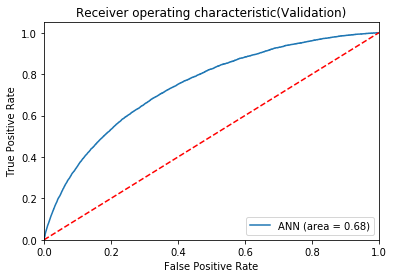

In [69]:
confusion_matric=confusion_matrix(y_test,logreg.predict(X_test))
acc=(confusion_matric[0][0]+confusion_matric[1][1])/(confusion_matric[0][0]+confusion_matric[0][1]+confusion_matric[1][0]+confusion_matric[1][1])
print("Percentage accuracy is ", acc)
fpr, tpr, thresholds = roc_curve(y_test,probability[:,1])
plt.figure()
plt.plot(fpr, tpr, label='ANN (area = %0.2f)' % logit_roc_auc2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic(Validation)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC2')

0.6820847570961662


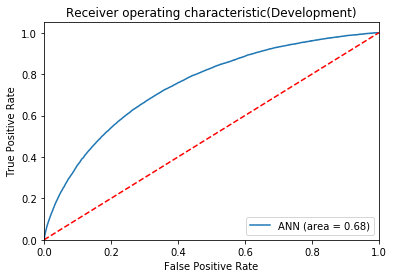

In [70]:
logit_roc_auc=roc_auc_score(y_train,logreg.predict(X_train))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='ANN (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic(Development)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')

In [120]:
from keras.utils import to_categorical
from keras import models
from keras import layers
from keras.metrics import Recall

In [121]:
model = models.Sequential()

In [122]:
model.add(layers.Dense(90, activation = "sigmoid", input_shape=(198, )))

In [123]:
model.add(layers.Dense(45, activation = "sigmoid", input_shape=(90,)))

In [124]:
#model.add(layers.Dense(90, activation = "relu"))

In [125]:
model.add(layers.Dense(1, activation = "sigmoid"))

In [126]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 90)                17910     
_________________________________________________________________
dense_13 (Dense)             (None, 45)                4095      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 46        
Total params: 22,051
Trainable params: 22,051
Non-trainable params: 0
_________________________________________________________________


In [127]:
model.compile(
 optimizer = "sgd",
 loss = "mean_squared_error",
 metrics = [Recall(), ]
)

In [128]:
weight={0:11,1:120}
results = model.fit(
 X_train, y_train,
 epochs= 30,#30
 batch_size = 32,#1024
 class_weight=weight
)

Epoch 1/30
215257/215257 [==============================] - 15s 69us/step - loss: 4.1706 - recall_3: 0.6591
Epoch 2/30
215257/215257 [==============================] - 14s 67us/step - loss: 4.0773 - recall_3: 0.6711
Epoch 3/30
215257/215257 [==============================] - 14s 67us/step - loss: 4.0381 - recall_3: 0.6743
Epoch 4/30
215257/215257 [==============================] - 14s 65us/step - loss: 4.0101 - recall_3: 0.6794
Epoch 5/30
215257/215257 [==============================] - 14s 64us/step - loss: 3.9732 - recall_3: 0.6879
Epoch 6/30
215257/215257 [==============================] - 15s 71us/step - loss: 3.9450 - recall_3: 0.6896
Epoch 7/30
215257/215257 [==============================] - 13s 60us/step - loss: 3.9161 - recall_3: 0.6951
Epoch 8/30
215257/215257 [==============================] - 16s 73us/step - loss: 3.8830 - recall_3: 0.6999
Epoch 9/30
215257/215257 [==============================] - 15s 68us/step - loss: 3.8482 - recall_3: 0.7051
Epoch 10/30
215257/215257 [=

In [129]:
prediction=model.predict_classes(X_test)

In [130]:
from sklearn.metrics import classification_report,confusion_matrix

In [131]:
print(confusion_matrix(y_test,prediction))

[[58585 26306]
 [ 2837  4526]]


In [132]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.95      0.69      0.80     84891
           1       0.15      0.61      0.24      7363

    accuracy                           0.68     92254
   macro avg       0.55      0.65      0.52     92254
weighted avg       0.89      0.68      0.76     92254



In [133]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc2=roc_auc_score(y_test,prediction)
print(logit_roc_auc2)

0.6524076844926064


Percentage accuracy is  0.6841004184100419


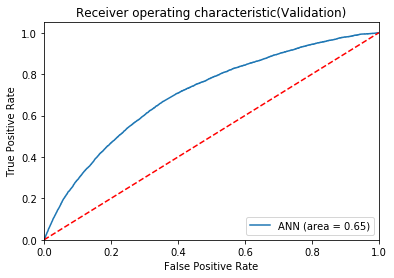

In [134]:
confusion_matric=confusion_matrix(y_test,prediction)
acc=(confusion_matric[0][0]+confusion_matric[1][1])/(confusion_matric[0][0]+confusion_matric[0][1]+confusion_matric[1][0]+confusion_matric[1][1])
print("Percentage accuracy is ", acc)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test))
plt.figure()
plt.plot(fpr, tpr, label='ANN (area = %0.2f)' % logit_roc_auc2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic(Validation)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC2')

0.85590269113147


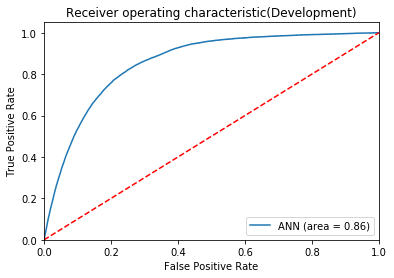

In [135]:
logit_roc_auc=roc_auc_score(y_train,model.predict(X_train))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_train, model.predict_proba(X_train))
plt.figure()
plt.plot(fpr, tpr, label='ANN (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic(Development)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')

In [119]:
#weights=[[]]
#for layer in model.layers:
 #   weights.append(layer.get_weights())